In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [3]:
import os
print(os.curdir)
df = pd.read_csv(r'../../Misc/CCD_PM2_5.csv')

.


# Regression plots before correction

In [4]:
df

,GRIMM,ATMOS,Purple Air,Alphasense
0,36.50,46.0,81.290,14.922
1,38.05,50.0,85.170,15.208
2,38.25,48.5,89.875,16.247
3,37.00,49.0,92.590,16.506
4,36.55,49.5,94.450,15.542
...,...,...,...,...
113,28.25,40.0,69.205,8.413
114,28.40,42.5,67.035,8.589
115,27.95,43.0,68.810,8.360
116,28.70,41.0,70.305,8.578


[Text(0, 0.5, 'PM2.5'), Text(0.5, 0, 'time')]

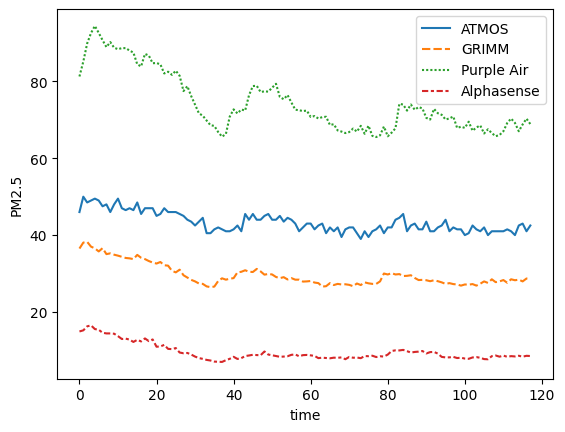

In [5]:
sns.lineplot(data=df[['ATMOS','GRIMM','Purple Air','Alphasense']]).set(ylabel = 'PM2.5', xlabel='time')

<Axes: >

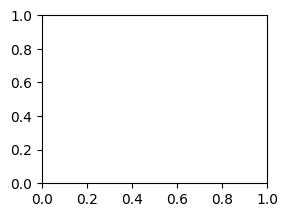

In [6]:
plt.subplot(2,2,1)

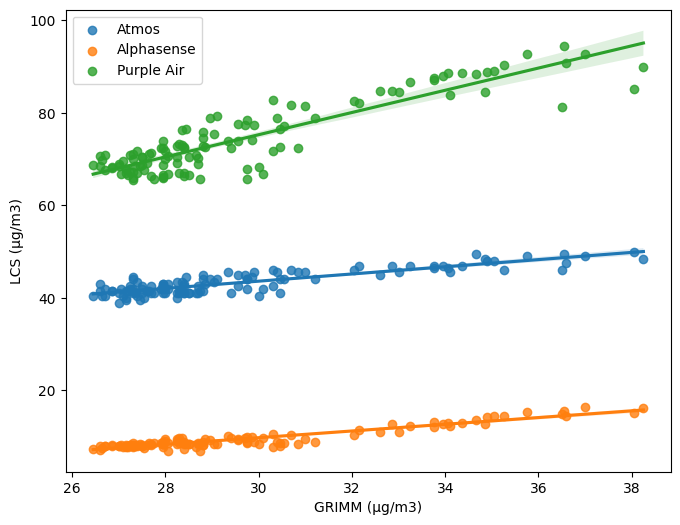

In [7]:
fig, ax = plt.subplots(figsize=(7.81, 6))
sns.regplot(x='GRIMM', y='ATMOS', data=df, fit_reg=True, ax=ax, label='Atmos')
sns.regplot(x='GRIMM', y='Alphasense', data=df, fit_reg=True, ax=ax, label='Alphasense')
sns.regplot(x='GRIMM', y='Purple Air', data=df, fit_reg=True, ax=ax, label='Purple Air')
ax.set(ylabel='LCS (µg/m3)', xlabel='GRIMM (µg/m3)')
ax.legend()
plt.show()

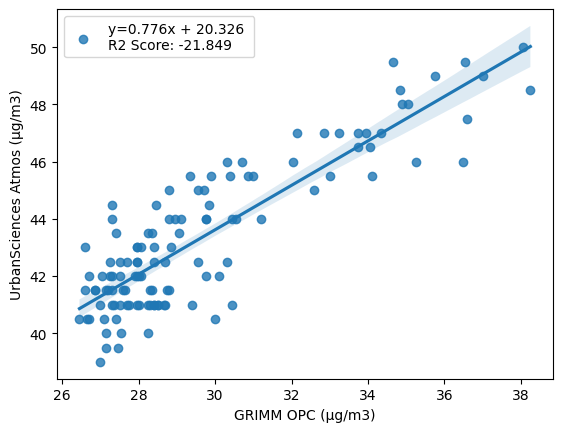

In [8]:
label=f"y={LinearRegression().fit(df['GRIMM'].to_numpy().reshape(-1,1), df['ATMOS']).coef_[0]:.3f}x + {LinearRegression().fit(df[['GRIMM']].to_numpy().reshape(-1,1), df[['ATMOS']]).intercept_[0]:.3f} \nR2 Score: {r2_score(df['GRIMM'], df['ATMOS']) :.3f}"
sns.regplot(x='GRIMM', y='ATMOS', data=df, fit_reg=True, label=label).set(xlabel = 'GRIMM OPC (µg/m3)',ylabel = 'UrbanSciences Atmos (µg/m3)')
plt.legend()
plt.show()


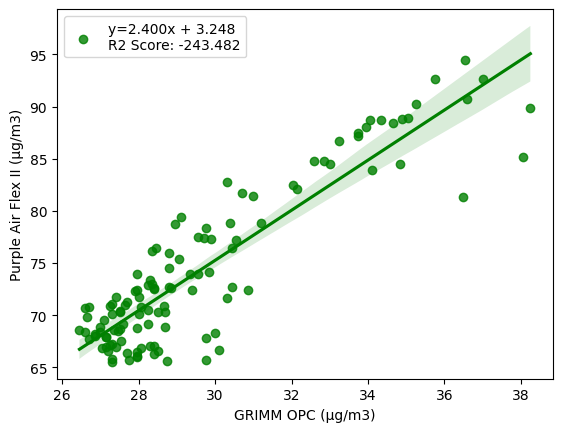

In [9]:
label=f"y={LinearRegression().fit(df['GRIMM'].to_numpy().reshape(-1,1), df['Purple Air']).coef_[0]:.3f}x + {LinearRegression().fit(df[['GRIMM']].to_numpy().reshape(-1,1), df[['Purple Air']]).intercept_[0]:.3f} \nR2 Score: {r2_score(df['GRIMM'], df['Purple Air']) :.3f}"
sns.regplot(x='GRIMM', y='Purple Air', data=df, fit_reg=True, label=label, color='green').set(xlabel = 'GRIMM OPC (µg/m3)',ylabel = 'Purple Air Flex II (µg/m3)')
plt.legend()
plt.show()

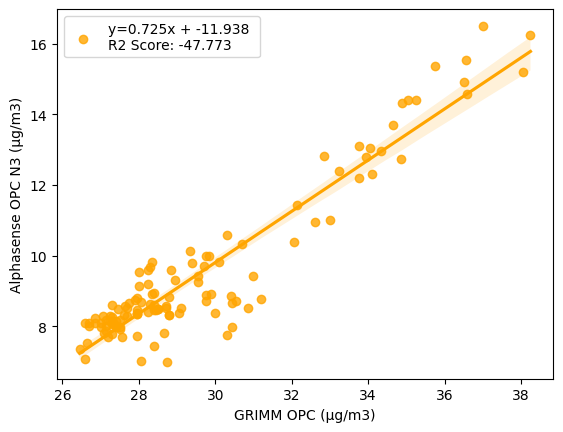

In [10]:
label=f"y={LinearRegression().fit(df['GRIMM'].to_numpy().reshape(-1,1), df['Alphasense']).coef_[0]:.3f}x + {LinearRegression().fit(df[['GRIMM']].to_numpy().reshape(-1,1), df[['Alphasense']]).intercept_[0]:.3f} \nR2 Score: {r2_score(df['GRIMM'], df['Alphasense']) :.3f}"
sns.regplot(x='GRIMM', y='Alphasense', data=df, fit_reg=True, label=label, color='orange').set(xlabel = 'GRIMM OPC (µg/m3)',ylabel = 'Alphasense OPC N3 (µg/m3)')
plt.legend()
plt.show()

# Model Training

In [11]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size=0.8, random_state=1306)

In [12]:
train

,GRIMM,ATMOS,Purple Air,Alphasense
31,27.40,43.5,71.705,7.988
14,33.75,46.5,87.505,12.190
74,27.70,41.0,66.375,8.515
89,28.35,41.5,72.970,9.831
98,27.15,41.5,67.895,8.001
...,...,...,...,...
63,26.60,43.0,70.715,8.093
9,34.90,48.0,88.770,14.330
58,27.90,42.0,72.300,8.754
8,35.25,46.0,90.240,14.408


In [13]:
# from sklearn.linear_model import LinearRegression
# lr_atmos = LinearRegression().fit(df['ATMOS'].to_numpy().reshape(-1,1), df['GRIMM'])
# lr_pa = LinearRegression().fit(df['Purple Air'].to_numpy().reshape(-1,1), df['GRIMM'])
# lr_n3 = LinearRegression().fit(df['Alphasense'].to_numpy().reshape(-1,1), df['GRIMM'])

In [14]:
from sklearn.tree import DecisionTreeRegressor
lr_atmos = DecisionTreeRegressor().fit(train['ATMOS'].to_numpy().reshape(-1,1), train['GRIMM'])
lr_pa = DecisionTreeRegressor().fit(train['Purple Air'].to_numpy().reshape(-1,1), train['GRIMM'])
lr_n3 = DecisionTreeRegressor().fit(train['Alphasense'].to_numpy().reshape(-1,1), train['GRIMM'])

In [15]:
copy_df = df.copy()
df = test

In [16]:
len(df)

24

In [17]:
df['corrected_atmos'] = lr_atmos.predict(df['ATMOS'].to_numpy().reshape(-1,1))
df['corrected_pa'] = lr_pa.predict(df['Purple Air'].to_numpy().reshape(-1,1))
df['corrected_n3'] = lr_n3.predict(df['Alphasense'].to_numpy().reshape(-1,1))

In [18]:
palette = [tuple((*sns.color_palette('Set2')[0], 1))] + list(map(lambda x: x + (0.7,), sns.color_palette('Set2')[1:]))
print(palette)


[(0.4, 0.7607843137254902, 0.6470588235294118, 1), (0.9882352941176471, 0.5529411764705883, 0.3843137254901961, 0.7), (0.5529411764705883, 0.6274509803921569, 0.796078431372549, 0.7), (0.9058823529411765, 0.5411764705882353, 0.7647058823529411, 0.7), (0.6509803921568628, 0.8470588235294118, 0.32941176470588235, 0.7), (1.0, 0.8509803921568627, 0.1843137254901961, 0.7), (0.8980392156862745, 0.7686274509803922, 0.5803921568627451, 0.7), (0.7019607843137254, 0.7019607843137254, 0.7019607843137254, 0.7)]


C:\Users\hitan\AppData\Local\Temp\ipykernel_3404\1687046562.py:1: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.lineplot(data=df[['GRIMM','corrected_pa','corrected_n3','corrected_atmos']], palette=[tuple((*sns.color_palette()[0], 1))] + list(map(lambda x: x + (0.6,), sns.color_palette()[1:]))


<Axes: >

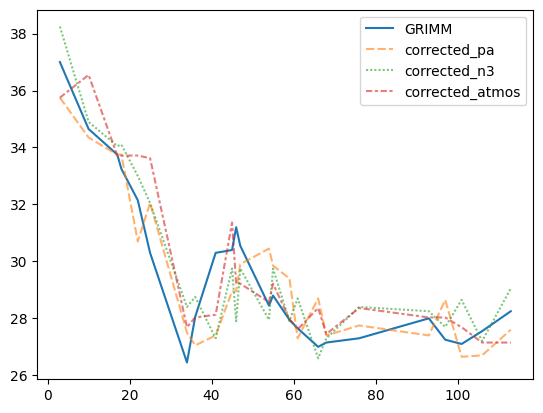

In [19]:
sns.lineplot(data=df[['GRIMM','corrected_pa','corrected_n3','corrected_atmos']], palette=[tuple((*sns.color_palette()[0], 1))] + list(map(lambda x: x + (0.6,), sns.color_palette()[1:]))
)

C:\Users\hitan\AppData\Local\Temp\ipykernel_3404\2737163121.py:3: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.lineplot(data=df, palette=sns.color_palette("Set2"), dashes=False)


<Axes: >

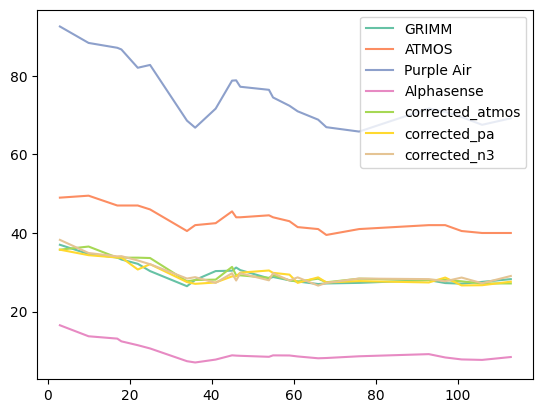

In [20]:
import seaborn as sns

sns.lineplot(data=df, palette=sns.color_palette("Set2"), dashes=False)

<Axes: >

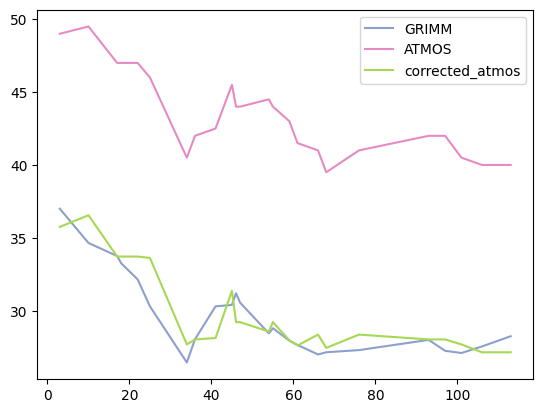

In [21]:
sns.lineplot(data=df[['GRIMM','ATMOS','corrected_atmos']], palette=sns.color_palette("Set2")[2:5], dashes=False)

Atmos is the most corrected out of the box. 

<Axes: >

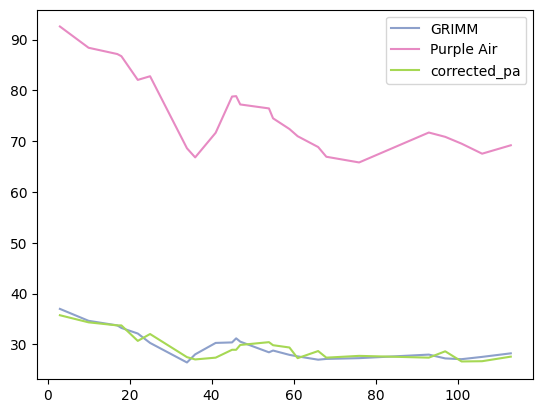

In [22]:
sns.lineplot(data=df[['GRIMM','Purple Air','corrected_pa']], palette=sns.color_palette("Set2")[2:5], dashes=False)

<Axes: >

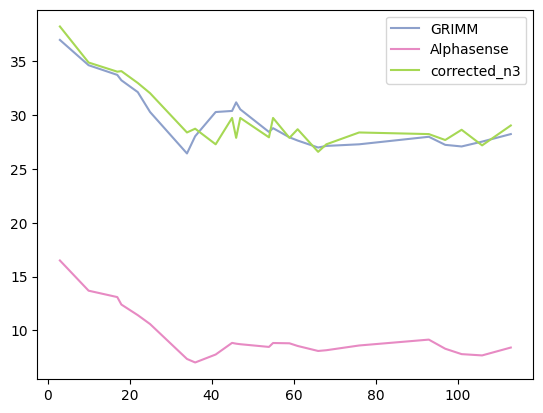

In [23]:
sns.lineplot(data=df[['GRIMM','Alphasense','corrected_n3']], palette=sns.color_palette("Set2")[2:5], dashes=False)

# Reg Plots

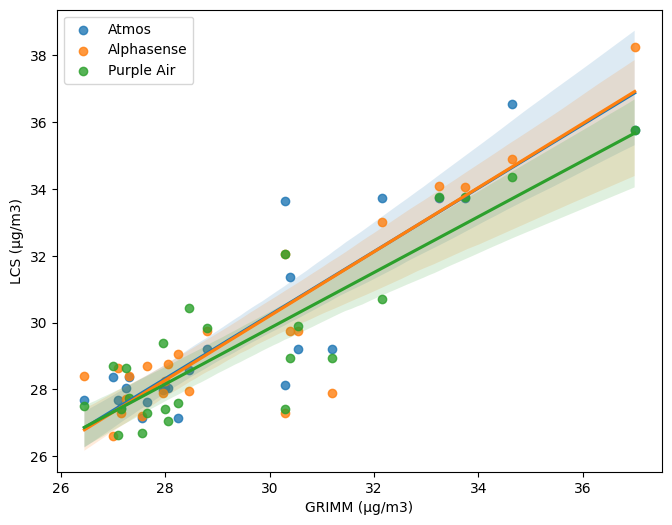

In [24]:
fig, ax = plt.subplots(figsize=(7.81,6))
sns.regplot(x='GRIMM', y='corrected_atmos', data=df, fit_reg=True, ax=ax, label='Atmos')
sns.regplot(x='GRIMM', y='corrected_n3', data=df, fit_reg=True, ax=ax, label='Alphasense')
sns.regplot(x='GRIMM', y='corrected_pa', data=df, fit_reg=True, ax=ax, label='Purple Air')
ax.set(ylabel='LCS (µg/m3)', xlabel='GRIMM (µg/m3)')
ax.legend()
plt.show()

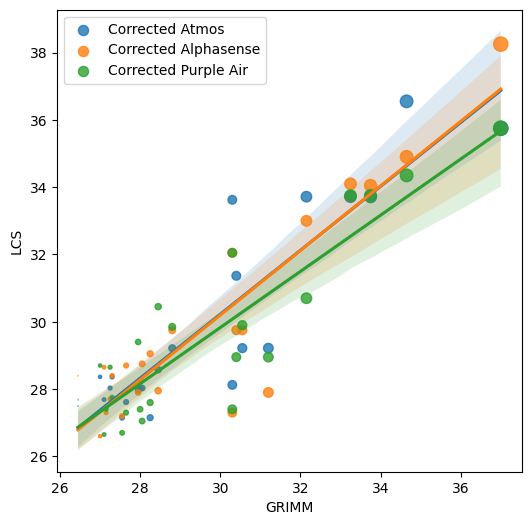

In [25]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.regplot(x='GRIMM', y='corrected_atmos', data=df, fit_reg=True, ax=ax, label='Corrected Atmos',scatter_kws={'s':(df['GRIMM']-df['GRIMM'].min() + 0.01) * 10})
sns.regplot(x='GRIMM', y='corrected_n3', data=df, fit_reg=True, ax=ax, label='Corrected Alphasense',scatter_kws={'s':(df['GRIMM']-df['GRIMM'].min() + 0.01) * 10})
sns.regplot(x='GRIMM', y='corrected_pa', data=df, fit_reg=True, ax=ax, label='Corrected Purple Air',scatter_kws={'s':(df['GRIMM']-df['GRIMM'].min() + 0.01) * 10})
ax.set(ylabel='LCS', xlabel='GRIMM')
ax.legend()
plt.show()

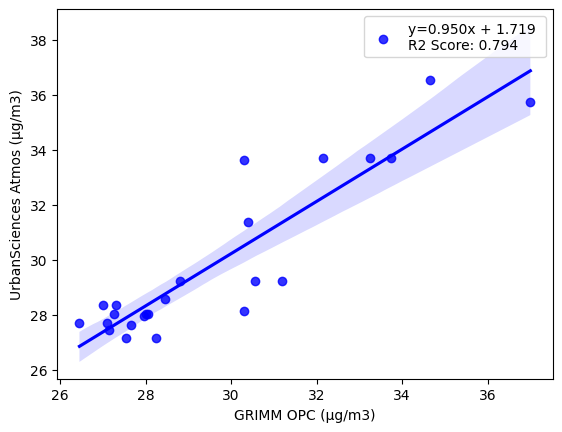

In [26]:
label=f"y={LinearRegression().fit(df['GRIMM'].to_numpy().reshape(-1,1), df['corrected_atmos']).coef_[0]:.3f}x + {LinearRegression().fit(df[['GRIMM']].to_numpy().reshape(-1,1), df[['corrected_atmos']]).intercept_[0]:.3f} \nR2 Score: {r2_score(df['GRIMM'], df['corrected_atmos']) :.3f}"
sns.regplot(x='GRIMM', y='corrected_atmos', data=df, fit_reg=True, label=label, color='blue').set(xlabel = 'GRIMM OPC (µg/m3)',ylabel = 'UrbanSciences Atmos (µg/m3)')
            # scatter_kws={'s':(df['GRIMM']-df['GRIMM'].min() + 0.01) * 10})
plt.legend()
plt.show()

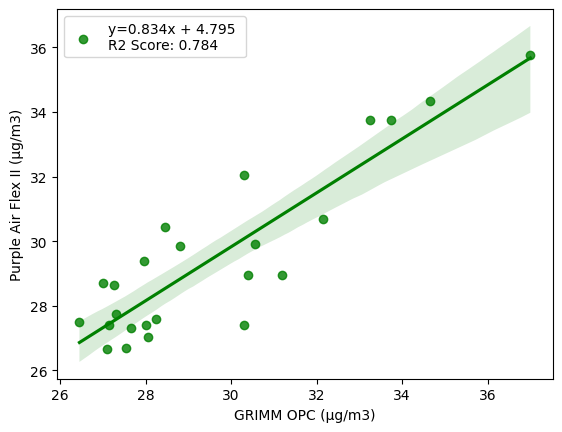

In [27]:
label=f"y={LinearRegression().fit(df['GRIMM'].to_numpy().reshape(-1,1), df['corrected_pa']).coef_[0]:.3f}x + {LinearRegression().fit(df[['GRIMM']].to_numpy().reshape(-1,1), df[['corrected_pa']]).intercept_[0]:.3f} \nR2 Score: {r2_score(df['GRIMM'], df['corrected_pa']) :.3f}"
sns.regplot(x='GRIMM', y='corrected_pa', data=df, fit_reg=True, label=label, color='green').set(xlabel = 'GRIMM OPC (µg/m3)',ylabel = 'Purple Air Flex II (µg/m3)')
plt.legend()
plt.show()

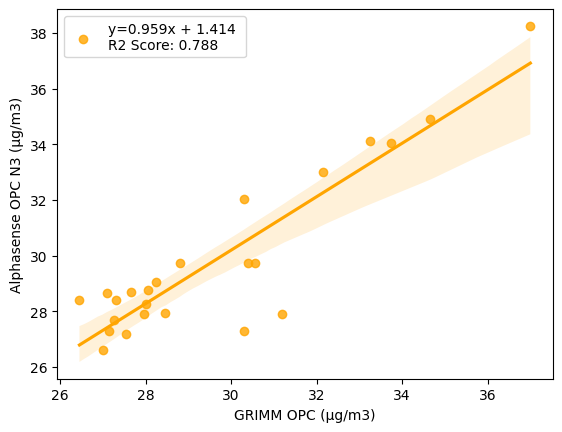

In [28]:

label=f"y={LinearRegression().fit(df['GRIMM'].to_numpy().reshape(-1,1), df['corrected_n3']).coef_[0]:.3f}x + {LinearRegression().fit(df[['GRIMM']].to_numpy().reshape(-1,1), df[['corrected_n3']]).intercept_[0]:.3f} \nR2 Score: {r2_score(df['GRIMM'], df['corrected_n3']) :.3f}"
sns.regplot(x='GRIMM', y='corrected_n3', data=df, fit_reg=True, color='orange', label=label).set(xlabel = 'GRIMM OPC (µg/m3)',ylabel = 'Alphasense OPC N3 (µg/m3)')
plt.legend()
plt.show()

# Evaluation

In [29]:
df.to_csv('LR_Data_PM_2_5.csv')

In [30]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
print('BEFORE CORRECTION')
print('--------------------------------------------')
print('MAE ATMOS     : ', f"{mean_absolute_error(df['GRIMM'], df['ATMOS']) :.3f}")
print('MAE Purple Air: ', f"{mean_absolute_error(df['GRIMM'], df['Purple Air']) :.3f}")
print('MAE OPC N3    : ', f"{mean_absolute_error(df['GRIMM'], df['Alphasense']) :.3f}")
print('\n')
print('R2 ATMOS     : ', f"{r2_score(df['GRIMM'], df['ATMOS']) :.3f}")
print('R2 Purple Air: ', f"{r2_score(df['GRIMM'], df['Purple Air']) :.3f}")
print('R2 OPC N3    : ', f"{r2_score(df['GRIMM'], df['Alphasense']) :.3f}")
print('\n')
print('MAPE ATMOS     : ', f"{mean_absolute_percentage_error(df['GRIMM'], df['ATMOS']) :.3f}")
print('MAPE Purple Air: ', f"{mean_absolute_percentage_error(df['GRIMM'], df['Purple Air']) :.3f}")
print('MAPE OPC N3    : ', f"{mean_absolute_percentage_error(df['GRIMM'], df['Alphasense']) :.3f}")
print('\n')
print('AFTER CORRECTION')
print('--------------------------------------------')
print('MAE ATMOS     : ', f"{mean_absolute_error(df['GRIMM'], df['corrected_atmos']) :.3f}")
print('MAE Purple Air: ', f"{mean_absolute_error(df['GRIMM'], df['corrected_pa']) :.3f}")
print('MAE OPC N3    : ', f"{mean_absolute_error(df['GRIMM'], df['corrected_n3']) :.3f}")
print('\n')
print('R2 ATMOS     : ', f"{r2_score(df['GRIMM'], df['corrected_atmos']) :.3f}")
print('R2 Purple Air: ', f"{r2_score(df['GRIMM'], df['corrected_pa']) :.3f}")
print('R2 OPC N3    : ', f"{r2_score(df['GRIMM'], df['corrected_n3']) :.3f}")
print('\n')
print('MAPE ATMOS     : ', f"{mean_absolute_percentage_error(df['GRIMM'], df['corrected_atmos']) :.3f}")
print('MAPE Purple Air: ', f"{mean_absolute_percentage_error(df['GRIMM'], df['corrected_pa']) :.3f}")
print('MAPE OPC N3    : ', f"{mean_absolute_percentage_error(df['GRIMM'], df['corrected_n3']) :.3f}")



BEFORE CORRECTION
--------------------------------------------
MAE ATMOS     :  13.854
MAE Purple Air:  45.672
MAE OPC N3    :  20.142


R2 ATMOS     :  -24.544
R2 Purple Air:  -278.097
R2 OPC N3    :  -52.780


MAPE ATMOS     :  0.472
MAPE Purple Air:  1.542
MAPE OPC N3    :  0.684


AFTER CORRECTION
--------------------------------------------
MAE ATMOS     :  0.937
MAE Purple Air:  1.073
MAE OPC N3    :  0.969


R2 ATMOS     :  0.794
R2 Purple Air:  0.784
R2 OPC N3    :  0.788


MAPE ATMOS     :  0.031
MAPE Purple Air:  0.036
MAPE OPC N3    :  0.033


[Text(0.5491071428571429, 0.95, 'Atmos PM 2.5 <= 45.75\nsquared_error = 8.492\nsamples = 94\nvalue = 29.647'),
 Text(0.36607142857142855, 0.85, 'Atmos PM 2.5 <= 44.75\n2.081\n77\n28.485'),
 Text(0.26785714285714285, 0.75, 'Atmos PM 2.5 <= 43.75\n0.977\n67\n28.127'),
 Text(0.17857142857142858, 0.65, 'Atmos PM 2.5 <= 40.75\n0.811\n59\n28.001'),
 Text(0.10714285714285714, 0.55, 'Atmos PM 2.5 <= 40.25\n1.142\n7\n27.479'),
 Text(0.07142857142857142, 0.45, 'Atmos PM 2.5 <= 39.25\n0.035\n3\n27.2'),
 Text(0.03571428571428571, 0.35, '0.0\n1\n27.0'),
 Text(0.10714285714285714, 0.35, 'Atmos PM 2.5 <= 39.75\n0.023\n2\n27.3'),
 Text(0.07142857142857142, 0.25, '0.0\n1\n27.45'),
 Text(0.14285714285714285, 0.25, '0.0\n1\n27.15'),
 Text(0.14285714285714285, 0.45, '1.87\n4\n27.688'),
 Text(0.25, 0.55, 'Atmos PM 2.5 <= 41.25\n0.725\n52\n28.071'),
 Text(0.21428571428571427, 0.45, '0.536\n16\n28.362'),
 Text(0.2857142857142857, 0.45, 'Atmos PM 2.5 <= 41.75\n0.755\n36\n27.942'),
 Text(0.25, 0.35, '0.581\n11

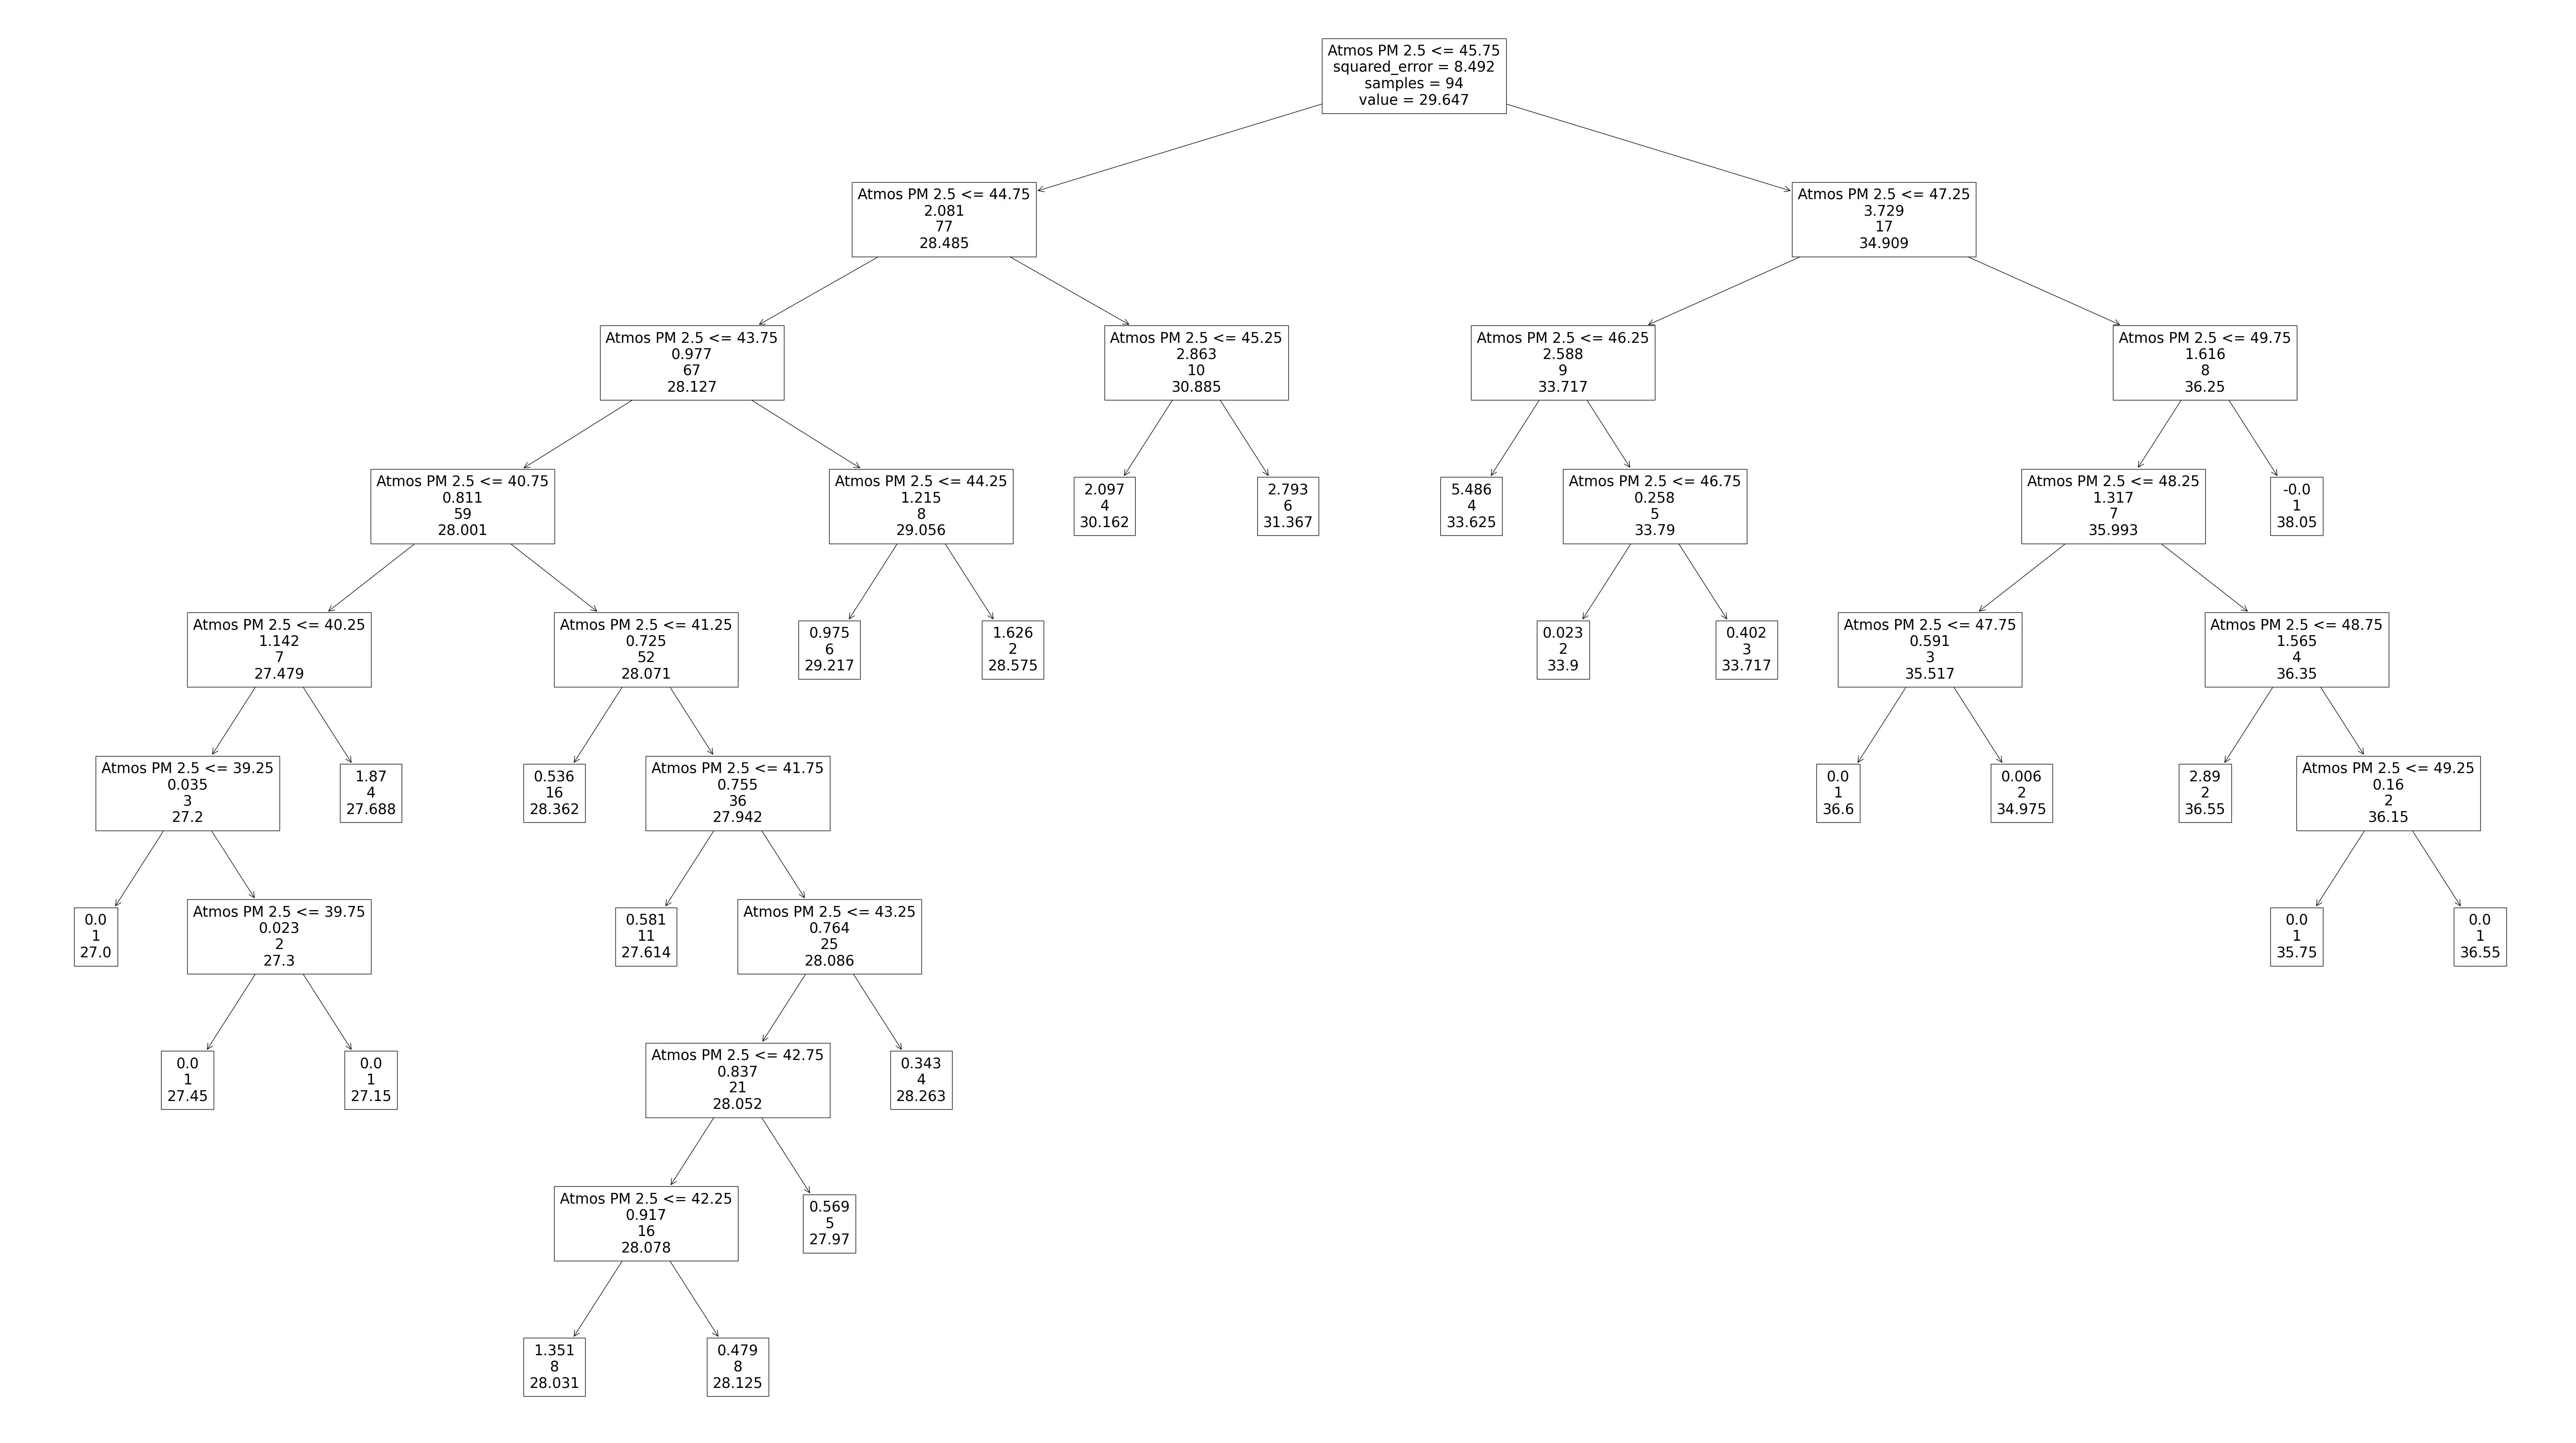

In [32]:
from sklearn import tree
plt.figure(figsize=(80,45))
tree.plot_tree(lr_atmos, feature_names=['Atmos PM 2.5'], label='root')